# The purpose of this project is to explore detailed insights into marketing with seasonal trends in retail sales

#### Import Libraries

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("working....")

working....


### Import data

In [4]:
# import csv
retail_data = pd.read_csv(r"C:\Users\HP\OneDrive\Documentos\retail_data.csv")
retail_data.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


#### Data cleaning process

In [6]:
# getting the infomation of datasets
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1000000 non-null  int64  
 1   age                        1000000 non-null  int64  
 2   gender                     1000000 non-null  object 
 3   income_bracket             1000000 non-null  object 
 4   loyalty_program            1000000 non-null  object 
 5   membership_years           1000000 non-null  int64  
 6   churned                    1000000 non-null  object 
 7   marital_status             1000000 non-null  object 
 8   number_of_children         1000000 non-null  int64  
 9   education_level            1000000 non-null  object 
 10  occupation                 1000000 non-null  object 
 11  transaction_id             1000000 non-null  int64  
 12  transaction_date           1000000 non-null  object 
 13  product_id   

In [7]:
# checking for null values
retail_data.isnull().sum()

customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
                           ..
email_subscriptions         0
app_usage                   0
website_visits              0
social_media_engagement     0
days_since_last_purchase    0
Length: 78, dtype: int64

### Check for duplicates

In [8]:
# checking for duplicates
retail_data.duplicated(keep=False).sum() 

0

In [9]:
# Getting column information
retail_data.columns

Index(['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', '

In [10]:
retail_data[['transaction_date','month_of_year','week_of_year']]



,transaction_date,month_of_year,week_of_year
0,2020-10-11 10:08:52,7,27
1,2021-12-08 01:07:40,2,20
2,2020-02-17 09:40:48,6,35
3,2020-08-13 00:43:14,8,42
4,2021-07-02 11:59:03,3,37
...,...,...,...
999995,2021-12-01 15:45:32,7,30
999996,2021-03-25 22:16:00,3,25
999997,2020-02-11 18:46:40,1,50
999998,2021-05-19 06:57:00,9,34


In [11]:
retail_data.index

RangeIndex(start=0, stop=1000000, step=1)

#### Describing the data statistically

In [12]:
# To describe the data
retail_data.describe()

,customer_id,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,...,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,48.496605,4.497453,2.000554,499891.731447,4999.564515,5.002649,500.261317,0.249910,11.505193,...,0.250137,5.054372,181.876207,499.920037,54993.644773,54972.766714,49.979109,9.496269,49.512951,182.027559
std,288675.278933,17.874381,2.872406,1.414214,288706.057652,2886.798391,2.583751,288.462860,0.144328,6.924460,...,0.144408,2.857848,105.228855,288.453056,25975.807799,25981.483139,28.860989,5.761233,28.869777,105.364598
min,1.000000,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,250000.750000,33.000000,2.000000,1.000000,249878.750000,2498.000000,3.000000,250.310000,0.130000,5.000000,...,0.130000,2.580000,91.000000,250.000000,32477.750000,32473.000000,24.970000,4.000000,25.000000,91.000000
50%,500000.500000,49.000000,4.000000,2.000000,499559.500000,4999.000000,5.000000,500.410000,0.250000,12.000000,...,0.250000,5.060000,182.000000,500.000000,54966.000000,54961.000000,49.960000,9.000000,50.000000,182.000000
75%,750000.250000,64.000000,7.000000,3.000000,750071.250000,7498.000000,7.000000,750.160000,0.370000,18.000000,...,0.380000,7.530000,273.000000,750.000000,77493.000000,77451.000000,74.950000,14.000000,75.000000,273.000000
max,1000000.000000,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,...,0.500000,10.000000,364.000000,999.000000,99998.000000,99998.000000,100.000000,19.000000,99.000000,364.000000


In [13]:
retail_data['customer_id'].nunique()

1000000

##  There are a wide range of insights you can derive from this dataset. Here's a breakdown of the key analysis opportunities across different domains:
1. customer insight (based on demographics eg age, income brackets etc, segmentation by behavior eg high vs low spenders)
2. Sales and Revenue Insights: sales performance

<h3> Group customers based on demographics

#### Customers counts by gender

['Other' 'Female' 'Male'] 

Total male and female customers are:
    gender  Number of Customers
0   other               333734
1  female               333720
2    male               332546 



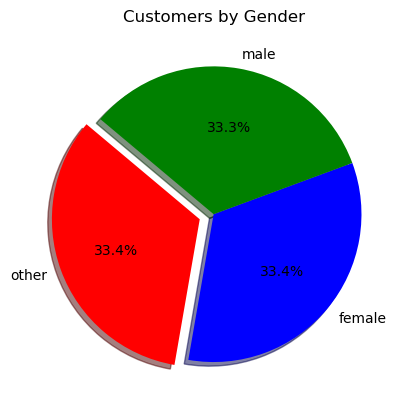

In [16]:
# counts by gender
#find the number values in gender column
sex = retail_data['gender'].unique()
print(sex,'\n')

# Create a count of customers by gender (lowercased for consistency)
count_gender = retail_data['gender'].str.lower().value_counts().reset_index(name = "Number of Customers")

# Format the 'Number of Customers' with commas
print("Total male and female customers are:\n",count_gender,"\n")


#plotting a pie chart
colors = ['red','blue','green']
explode = (0.1,0,0)
plt.pie(count_gender["Number of Customers"],explode, labels = count_gender['gender'],colors = colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Customers by Gender")
plt.show()

#### Counts of Customers by marital status

['Divorced' 'Married' 'Single'] 

Total customers by marital status are:
   marital_status Number of Customers
0       divorced             333,816
1        married             333,234
2         single             332,950 



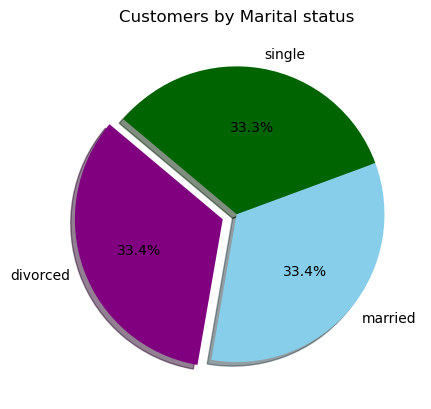

In [17]:


#find the number values in marital status column
status = retail_data['marital_status'].unique()
print(status,"\n")

# Create a count of customers by marital status (lowercased for consistency)
status_count = retail_data['marital_status'].str.lower().value_counts().reset_index(name = "Number of Customers")

# Format the 'Number of Customers' with commas
status_count["Number of Customers"] = status_count["Number of Customers"].map(lambda x: f"{x:,}")
print("Total customers by marital status are:\n",status_count,"\n")

#plotting a pie chart
colors = ['purple','skyblue','darkgreen']
explode = (0.1,0,0)
plt.pie(count_gender["Number of Customers"],explode=explode, labels = status_count['marital_status'],colors = colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Customers by Marital status")
plt.show()

####  We get the histogram distribution of Customers' age
#### firstly we group age according to age bracket

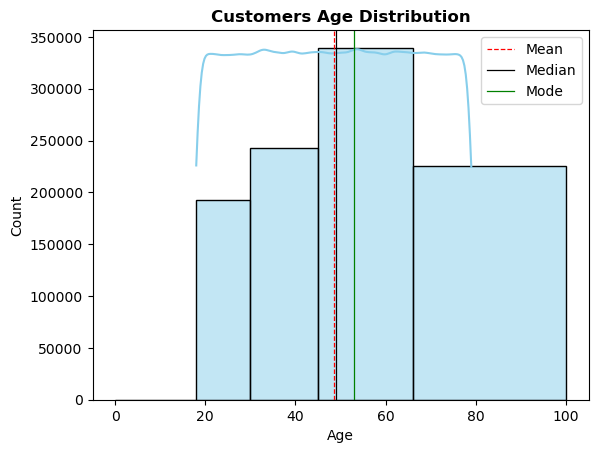

Age mean =  48.496605
Age median =  49.0
Age mode =  53


In [18]:
 

# Define age bins and labels

age_bins = [0, 18, 30, 45, 66,100]
age_labels = ['0-17', '18-29', '30-44', '45-65', '66+']
#age_bins = [0,18,28,38, 48, 58, 68, 78]
#age_labels = ['0-17', '18-27', '28-37', '38-47', '48-57','58-67','68+']
#create bin for age 
retail_data['age_bracket'] = pd.cut(retail_data['age'], bins=age_bins, labels=age_labels, right=False)

# plotting histogram to represent the distribution of customers' age
age_median = retail_data['age'].median()
age_mean = retail_data['age'].mean()
age_mode = retail_data['age'].mode()[0]
bins =  [0, 18, 30, 45, 66, 100]
sns.histplot(retail_data['age'],bins=bins,edgecolor='black',color='skyblue',kde=True) #log=True

# Adding vertical lines for mean, median, and mode
plt.axvline(age_mean, color='red', linestyle='--', lw=0.9, label='Mean')
plt.axvline(age_median, color='black', linestyle='-', lw=0.9, label='Median')
plt.axvline(age_mode, color='green', linestyle='-', lw=0.9, label='Mode')

plt.legend()
plt.title('Customers Age Distribution', fontweight='bold')
plt.xlabel("Age")

plt.show()
print("Age mean = ",age_mean)
print("Age median = ",age_median)
print("Age mode = ",age_mode)


In [19]:
#retail_data[['age','age_bracket']].head(5)

In [71]:
retail_data[['age','age_bracket','income_bracket']].head(20)

,age,age_bracket,income_bracket
0,56,45-65,High
1,69,66+,Medium
2,46,45-65,Low
3,32,30-44,Low
4,60,45-65,Low
5,25,18-29,Medium
6,78,66+,High
7,38,30-44,Low
8,56,45-65,Low
9,75,66+,Medium


#### grouping customers by their age_bracket and income_bracket 

In [22]:
# grouping customers by their age_bracket and income_bracket 
cust_age_income_brac = retail_data.groupby(['age_bracket','income_bracket'], observed = True).agg(
    Number_of_Customers=('customer_id', 'size')).reset_index() #count the customer

# Sorting 
cust_age_income_brac_sorted = cust_age_income_brac.sort_values(by="Number_of_Customers",ascending = False).reset_index(drop = True)
cust_age_income_brac_sorted

#

,age_bracket,income_bracket,Number_of_Customers
0,45-65,Low,113459
1,45-65,High,113147
2,45-65,Medium,112950
3,30-44,High,80972
4,30-44,Low,80896
5,30-44,Medium,80603
6,66+,Medium,75146
7,66+,High,75136
8,66+,Low,74837
9,18-29,Medium,64668


#### Using pivot table formula to group customer by age bracket and income bracket

income_bracket    High     Low  Medium
age_bracket                           
45-65           113147  113459  112950
30-44            80972   80896   80603
66+              75136   74837   75146
18-29            64357   63829   64668


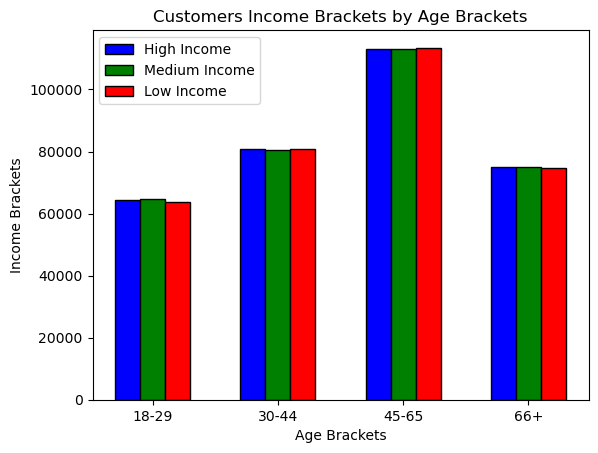

In [23]:

cust_age_income_brac_by_pivot = retail_data.pivot_table(index='age_bracket', columns = 'income_bracket',aggfunc= 'size',observed=True)
cust_age_income_brac_by_pivot_sorted = cust_age_income_brac_by_pivot.sort_values(by='Low',ascending = False)
print(cust_age_income_brac_by_pivot_sorted)

# Plotting multiple bar chart for visualization

#setting the bar width
w = 0.2 
bar_1 = np.arange(len(cust_age_income_brac_by_pivot.index))
bar_2 = [w + i for i in bar_1]
bar_3 = [w + i for i in bar_2]

# plotting th bars
plt.bar(bar_1,cust_age_income_brac_by_pivot['High'],w, color = 'blue', label = "High Income", edgecolor='black')
plt.bar(bar_2,cust_age_income_brac_by_pivot['Medium'],w, color = 'green', label = "Medium Income", edgecolor='black')
plt.bar(bar_3,cust_age_income_brac_by_pivot['Low'], w, color = 'red', label = "Low Income", edgecolor='black')

plt.title("Customers Income Brackets by Age Brackets")
plt.xlabel("Age Brackets")
plt.ylabel("Income Brackets")
plt.xticks(bar_1 + w,cust_age_income_brac_by_pivot.index)
plt.legend()
plt.show()

# Sales Performance

### To find nature of sales based on customer's demography (age, income, number of children and state etc)

#### Sales perfomance by marital status of customers

  marital_status  Number_of_Customers   Total_sales
0       Divorced               333816  1.688117e+09
1        Married               333234  1.684336e+09
2         Single               332950  1.683606e+09


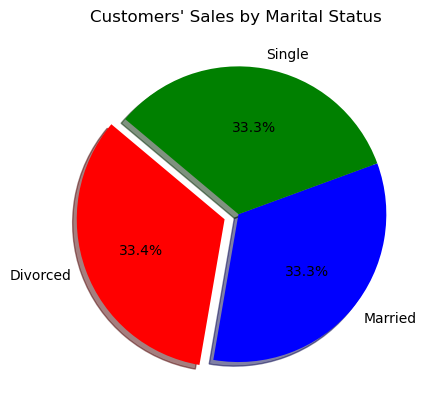

In [27]:
#  marital_status 
cust_age_income_brac = retail_data.groupby(['marital_status'], observed = True).agg(
    Number_of_Customers=('customer_id', 'size'), Total_sales=('total_sales','sum')).reset_index() #count the customer

### To get customers demographics with the highest sales
cust_age_income_brac=cust_age_income_brac.sort_values(by = 'Total_sales', ascending = False).reset_index(drop=True).head(10)
print(cust_age_income_brac)

#plotting a pie chart
colors = ['red','blue','green']
explode = (0.1,0,0)
plt.pie(cust_age_income_brac["Total_sales"],explode, labels =cust_age_income_brac['marital_status'] ,colors = colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Customers' Sales by Marital Status ")
plt.show()

#### Sales performance by customers' gender

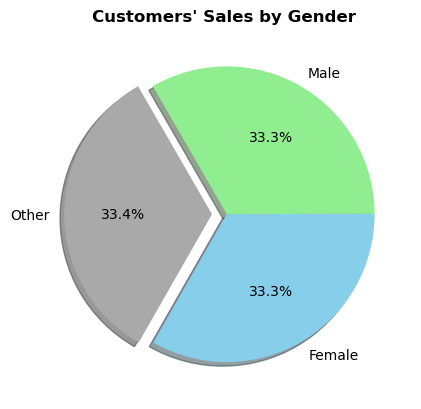

In [28]:
# Total sales by gender
sales_by_gender = retail_data.groupby(['gender'], observed = True).agg(Total_sales=('total_sales','sum')).reset_index() 
sales_by_gender =sales_by_gender.sort_values(by='Total_sales',ascending=False).reset_index(drop=True)
sales_by_gender

#plotting a pie chart
colors = ['darkgrey','skyblue','lightgreen']
explode = (0.1,0,0)
plt.pie(sales_by_gender["Total_sales"],explode, labels=sales_by_gender['gender'] ,colors = colors,autopct='%1.1f%%', shadow=True, startangle=120)
plt.title("Customers' Sales by Gender ", fontweight='bold')
plt.show()

#### Sales performance by customer's age and income brackets

   age_bracket income_bracket   Total_sales  Average_sales
0        18-29           High  3.252162e+08    5053.315501
1        18-29            Low  3.234449e+08    5067.365821
2        18-29         Medium  3.271234e+08    5058.504906
3        30-44           High  4.083320e+08    5042.878788
4        30-44            Low  4.095011e+08    5062.068144
5        30-44         Medium  4.059067e+08    5035.876415
6        45-65           High  5.725783e+08    5060.481387
7        45-65            Low  5.733725e+08    5053.566026
8        45-65         Medium  5.706536e+08    5052.267732
9          66+           High  3.801275e+08    5059.193020
10         66+            Low  3.785662e+08    5058.543856
11         66+         Medium  3.812372e+08    5073.286800 

income_bracket          High           Low        Medium
age_bracket                                             
18-29           3.252162e+08  3.234449e+08  3.271234e+08
30-44           4.083320e+08  4.095011e+08  4.059067e+08
45-

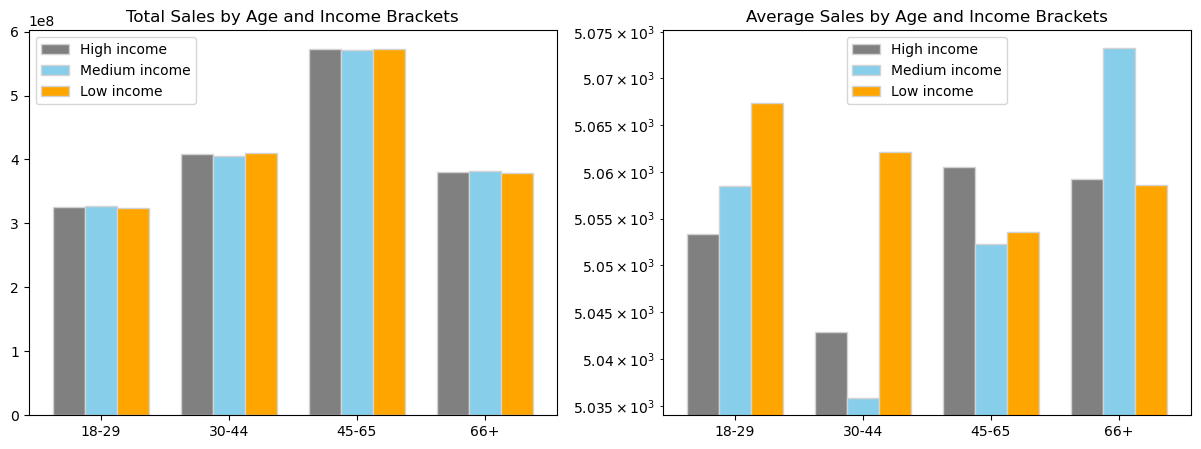

In [29]:
# total sales by income bracket and age brackets
age_inc_bracket_sales = retail_data.groupby(['age_bracket','income_bracket'],observed=True).agg(
    Total_sales=('total_sales', 'sum'), Average_sales=('total_sales','mean')).reset_index()
#age_inc_bracket_sales = age_inc_bracket_sales.sort_values(by='Average_sales',ascending=False)
print(age_inc_bracket_sales,'\n')
age_inc_bracket_sales_piv = age_inc_bracket_sales.pivot(index='age_bracket',columns='income_bracket',values='Total_sales') 
print(age_inc_bracket_sales_piv,'\n')
age_inc_bracket_average_sales_piv = age_inc_bracket_sales.pivot(index='age_bracket',columns='income_bracket',values='Average_sales')
print(age_inc_bracket_average_sales_piv,'\n')

# Plotting  bar chart to represent the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
w=0.25
bar1 = np.arange(len(age_inc_bracket_sales_piv.index))
bar2 = [w + i for i in bar1]
bar3 = [w + i for i in bar2]

#plotting the first bar chart to represent total sales by age and income
ax1.bar(bar1,age_inc_bracket_sales_piv['High'],w,color = 'grey',edgecolor='lightgrey',label='High income')
ax1.bar(bar2,age_inc_bracket_sales_piv['Medium'],w,color = 'skyblue',edgecolor='lightgrey',label='Medium income')
ax1.bar(bar3,age_inc_bracket_sales_piv['Low'],w,color = 'orange',edgecolor='lightgrey',label='Low income')
ax1.set_title('Total Sales by Age and Income Brackets' )
ax1.set_xticks(bar1+w,age_inc_bracket_sales_piv.index)
plt.yscale('log')

#plotting the second bar chart to represent average sales by age and income
ax2.bar(bar1,age_inc_bracket_average_sales_piv['High'],w,color = 'grey',edgecolor='lightgrey',label='High income')
ax2.bar(bar2,age_inc_bracket_average_sales_piv['Medium'],w,color = 'skyblue',edgecolor='lightgrey',label='Medium income')
ax2.bar(bar3,age_inc_bracket_average_sales_piv['Low'],w,color = 'orange',edgecolor='lightgrey',label='Low income')
ax2.set_title('Average Sales by Age and Income Brackets' )
ax2.set_xticks(bar1+w,age_inc_bracket_sales_piv.index)
ax1.legend()
ax2.legend()
plt.show()

#### Customer's sales and counts by number of children

  number_of_children  Number_of_Customers   Total_sales
0          one_child               200307  1.014507e+09
1      four_children               200157  1.012223e+09
2     three_children               200053  1.011081e+09
3       two_children               199730  1.009391e+09
4         zero_child               199753  1.008857e+09 



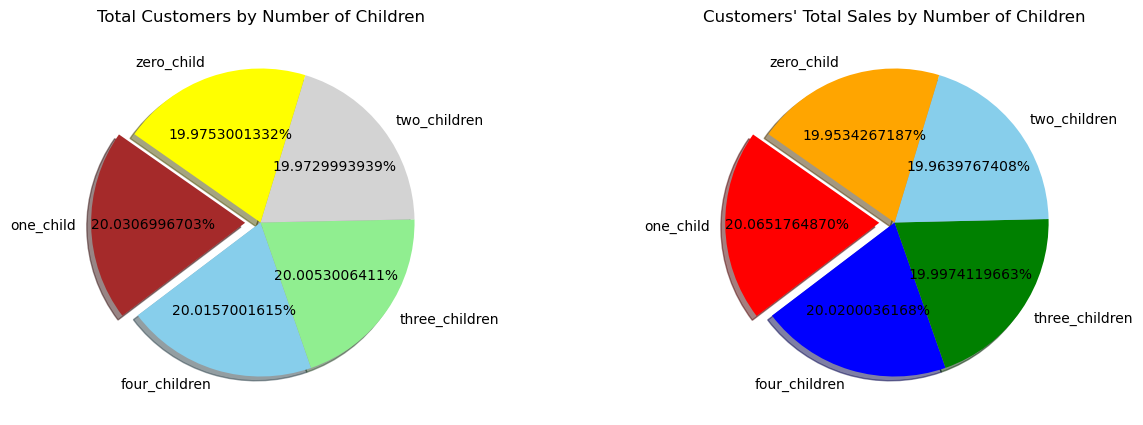

In [31]:
# grouping customers by number_of_children
cust_by_children = retail_data.groupby(["number_of_children"], observed = True).agg(
    Number_of_Customers=('customer_id', 'count'), Total_sales=('total_sales','sum')).reset_index() #count the customer

### To get customers demographics with the highest sales
cust_by_children = cust_by_children.sort_values(by = 'Total_sales', ascending = False).reset_index(drop=True) 
cust_by_children['number_of_children'] = cust_by_children['number_of_children'].map({1 : 'one_child', 4: 'four_children', 3:'three_children',2:'two_children',0:"zero_child"})
print(cust_by_children,"\n")


# Using a pie chart to represent counts of customers and total sales
colors1 = ['brown','skyblue','lightgreen','lightgrey','yellow']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title("Total Customers by Number of Children")
ax1.pie(cust_by_children['Number_of_Customers'],labels=cust_by_children['number_of_children'], colors = colors1,autopct = '%1.10f%%',explode = (0.1,0,0,0,0),shadow = True,startangle=145) 

#plotting the second pie chart
colors2 = ['red','blue','green','skyblue', 'orange']
ax2.set_title("Customers' Total Sales by Number of Children")
ax2.pie(cust_by_children['Total_sales'],labels=cust_by_children['number_of_children'], colors = colors2,autopct = '%1.10f%%',explode = (0.1,0,0,0,0),shadow = True,startangle=145) 

plt.show()


#### Store state's sales performance

  store_state   Total_sales  Num_of_Customers
0     State X  1.687622e+09            333702
1     State Z  1.685892e+09            333602
2     State Y  1.682545e+09            332696 



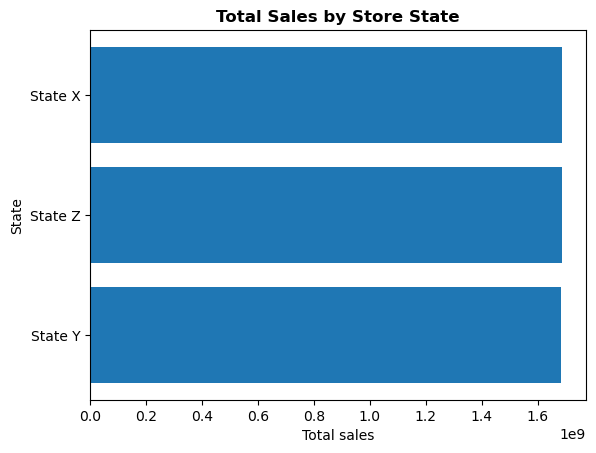

In [33]:
#sales by store state and city

# State with highest sales
state_sales = retail_data.groupby(['store_state']).agg(Total_sales=('total_sales','sum'),Num_of_Customers=('customer_id','count')).reset_index()
print(state_sales.sort_values(by='Total_sales',ascending=False).reset_index(drop=True),'\n')
state_sales = state_sales.sort_values(by='Total_sales',ascending=True).reset_index(drop=True)

#Plotting a horizontal

plt.barh(state_sales['store_state'],state_sales['Total_sales'])
plt.title('Total Sales by Store State',fontweight='bold')
plt.xlabel("Total sales")
plt.ylabel("State")
plt.show()

### Store location sales performance

  store_location   Total_sales  Num_of_Customers
0     Location D  1.261542e+09            249234
1     Location A  1.264147e+09            250150
2     Location B  1.264592e+09            250280
3     Location C  1.265778e+09            250336


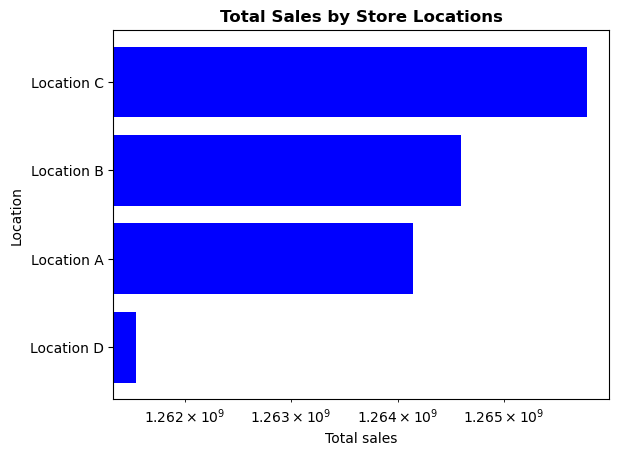

In [34]:
loc_sales = retail_data.groupby(['store_location']).agg(Total_sales=('total_sales','sum'),Num_of_Customers=('customer_id','count')).reset_index()
loc_sales = loc_sales.sort_values(by='Total_sales',ascending =True).reset_index(drop=True)
print(loc_sales)


#Plotting a horizontal 
plt.barh(loc_sales['store_location'],loc_sales['Total_sales'], color = 'blue',log=True)
plt.title('Total Sales by Store Locations',fontweight='bold')
plt.xlabel("Total sales")
plt.ylabel("Location")
plt.show()

#### Grouping to get the the top 5 and least 5 sales made by different store locations with their respective cities and states.

In [35]:
st_cty_loc_sales = retail_data.groupby(['store_state','store_city','store_location'])['total_sales'].sum().reset_index()
st_cty_loc_sales = st_cty_loc_sales.sort_values(by='total_sales',ascending=False).reset_index(drop=True)


Top_5sales_by_st_cty_loc = st_cty_loc_sales[0:5]
print('**Top Five State Sales By City and Store Location:\n', Top_5sales_by_st_cty_loc,'\n') 
Least_5sales_by_st_cty_loc= st_cty_loc_sales.tail().sort_values(by='total_sales',ascending=True).reset_index()
print('Least Five State Sales By City and Store Location:\n',Least_5sales_by_st_cty_loc)


**Top Five State Sales By City and Store Location:
   store_state store_city store_location   total_sales
0     State Y     City C     Location B  1.074387e+08
1     State X     City B     Location C  1.070899e+08
2     State Y     City D     Location C  1.065493e+08
3     State X     City C     Location A  1.065416e+08
4     State Z     City A     Location A  1.064398e+08 

Least Five State Sales By City and Store Location:
    index store_state store_city store_location   total_sales
0     47     State Y     City A     Location C  1.038142e+08
1     46     State Y     City D     Location D  1.039596e+08
2     45     State Y     City C     Location A  1.041206e+08
3     44     State Y     City A     Location A  1.041647e+08
4     43     State Z     City D     Location C  1.041964e+08


# CHURNED CUSTOMERS ANALYSIS

# Descriptive analysis between churned and non churned customers

#### Filter churned and non-churned customers

In [42]:

# Filter churned and non-churned customers
churned_customers = retail_data[retail_data['churned'] == 'Yes']
non_churned_customers = retail_data[retail_data['churned'] == 'No']



#### Descriptive statistics for comparison

In [44]:
churned_customers.describe()

,customer_id,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,...,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,...,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000,499729.000000
mean,500100.922826,48.489417,4.495829,2.002373,499401.056461,5000.720677,5.003436,500.221898,0.249847,11.499169,...,0.250538,5.051333,181.969928,499.858507,54996.830472,54945.449412,49.917973,9.499967,49.484407,181.848256
std,288703.817039,17.871378,2.872329,1.414519,288656.061820,2886.989673,2.582633,288.314952,0.144290,6.922408,...,0.144425,2.856878,105.121328,288.339244,25994.300360,25994.477846,28.868632,5.759818,28.874221,105.300692
min,5.000000,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,250124.000000,33.000000,2.000000,1.000000,249439.000000,2498.000000,3.000000,250.200000,0.120000,5.000000,...,0.130000,2.580000,91.000000,250.000000,32429.000000,32428.000000,24.890000,5.000000,24.000000,91.000000
50%,500067.000000,49.000000,4.000000,2.000000,498927.000000,5007.000000,5.000000,500.140000,0.250000,12.000000,...,0.250000,5.050000,182.000000,500.000000,55008.000000,54911.000000,49.860000,9.000000,49.000000,182.000000
75%,750317.000000,64.000000,7.000000,3.000000,749005.000000,7495.000000,7.000000,749.940000,0.370000,18.000000,...,0.380000,7.520000,273.000000,749.000000,77531.000000,77454.000000,74.910000,14.000000,75.000000,273.000000
max,1000000.000000,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,...,0.500000,10.000000,364.000000,999.000000,99998.000000,99998.000000,100.000000,19.000000,99.000000,364.000000


### churned_customers social media/apps engagements analysis


In [62]:
# to calculate the churned customers app usage,social media engagement, email subscription,and sales analysis
churned_analysis = churned_customers.groupby(['app_usage','social_media_engagement','email_subscriptions','loyalty_program','membership_years'])['total_sales'].sum()
churned_analysis = churned_analysis.sort_values().reset_index()
churned_analysis



,app_usage,social_media_engagement,email_subscriptions,loyalty_program,membership_years,total_sales
0,High,High,Yes,Yes,8,6323060.75
1,High,High,Yes,Yes,3,6423348.39
2,Low,Medium,Yes,Yes,6,6453506.15
3,High,Low,No,No,4,6460413.12
4,Medium,High,No,No,1,6497490.22
...,...,...,...,...,...,...
355,Medium,Low,No,No,0,7522920.22
356,High,Low,No,Yes,0,7555506.35
357,Low,Medium,No,No,6,7628548.37
358,Medium,Low,No,Yes,5,7641969.27


In [ ]:
# to calculate churned customers app usage,social media engagement, email subscription,and sales analysis
Non_churned_analysis = non_churned_customers.groupby(['app_usage','social_media_engagement','email_subscriptions','loyalty_program','membership_years'])['total_sales'].sum()
Non_churned_analysis = Non_churned_analysis.sort_values().reset_index()
Non_churned_analysis


<h3> Investigating Specific Factors: Days Since Last Purchase & Engagement Metrics
Compare days_since_last_purchase and engagement metrics for churned and non-churned customers.



<h4> Firstly let's convert  the categorical columns to binary by using get dummies or map functions.

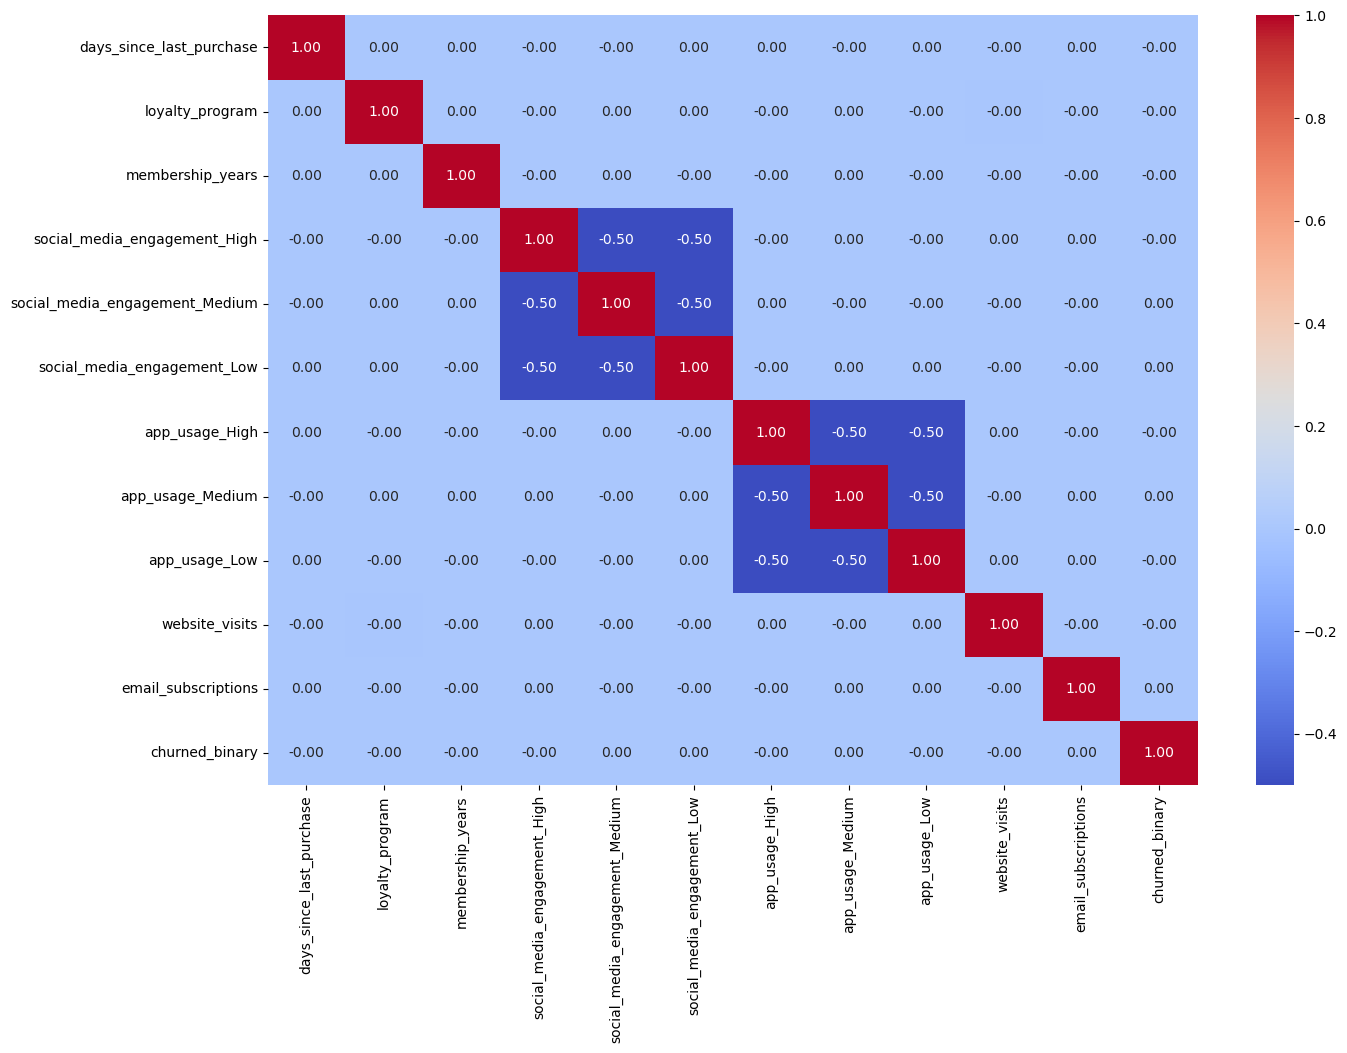

In [169]:
# Creating dummies to map social media engagements to binary
retail_data_dummy = pd.get_dummies(retail_data, columns=['social_media_engagement','app_usage'], drop_first=False)
#print(retail_data_dummy)

# Convert churned column to binary for correlation analysis
retail_data_dummy['churned_binary'] = retail_data_dummy['churned'].map({'Yes': 1, 'No': 0})

# Convert churned column to binary for correlation analysis
retail_data_dummy['email_subscriptions'] = retail_data_dummy['email_subscriptions'].map({'Yes': 1, 'No': 0})
#print(retail_data_dummy)

# Convert churned column to binary for correlation analysis
retail_data_dummy['loyalty_program'] = retail_data_dummy['loyalty_program'].map({'Yes': 1, 'No': 0})
#print(retail_data_dummy)


# Correlation analysis
churn_correlation = retail_data_dummy[['days_since_last_purchase','loyalty_program','membership_years','social_media_engagement_High','social_media_engagement_Medium', 'social_media_engagement_Low', 'app_usage_High','app_usage_Medium', 'app_usage_Low','website_visits', 'email_subscriptions', 'churned_binary']]
#print(churn_correlation.corr())

sns.heatmap(churn_correlation.corr(), annot=True, cmap='coolwarm', fmt='.2f')
#plt.rcParams['figure.figsize']=(15,10)
plt.show()

<h4> Alternatively, you can also solve the above churned correlation by using map function to assign numbers to categorical values by using the following exan

In [ ]:
# Assigning numbers to categorical data values
retail_data['social_media_engagement']

<h1> PRODUCT ANALYSIS

#### sales by product's category

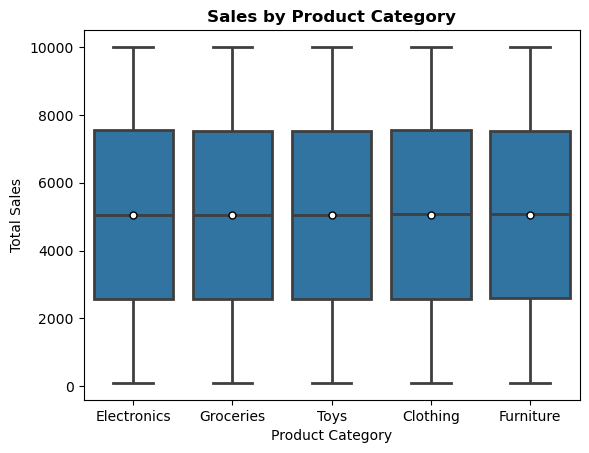

In [110]:
# Using boxplot to reprensent sales by product category
sns.boxplot(x='product_category',y="total_sales",data=retail_data,width=.8,showmeans=True,meanprops={'marker':"o"
                                                                                                    ,'markerfacecolor':"white"
                                                                                                    ,'markersize':'5'
                                                                                                    ,'markeredgecolor':'black'},linewidth=2)

plt.title('Sales by Product Category',fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.show()

#### Ten top and least product sales

In [116]:
# 10 top sales on products
retail_data['total_sales_in_millions'] = retail_data['total_sales']/1000000
top_product_sales = retail_data.groupby(['product_category','product_name'])['total_sales_in_millions'].sum().reset_index()
top_product_sales = top_product_sales.sort_values(by='total_sales_in_millions',ascending=False).reset_index(drop=True)
top_product_sales[:10]

,product_category,product_name,total_sales_in_millions
0,Toys,Product A,254.580526
1,Electronics,Product B,254.307118
2,Clothing,Product C,254.105740
3,Toys,Product B,254.063189
4,Electronics,Product C,253.756991
5,Groceries,Product D,253.716992
6,Furniture,Product D,253.621573
7,Furniture,Product A,252.989021
8,Toys,Product D,252.837510
9,Clothing,Product D,252.834521


In [ ]:
# ten least sales on products
product_sales = retail_data.groupby(['product_category','product_name'])['total_sales_in_millions'].sum().reset_index()
Ten_least_product_sales = product_sales.tail(10).sort_values(by='total_sales_in_millions').reset_index(drop=True)
Ten_least_product_sales 

In [ ]:
retail_data[['customer_id','total_returned_items','total_sales','total_items_purchased','unit_price','quantity','total_discounts_received','discount_applied','transaction_date']]

#### Returned items analysis

In [55]:
# Total number of items returned 
rtnd_items = retail_data['total_returned_items'].sum()
print('Number Of returned items:',rtnd_items)

# Total number of s0ld items
sold_items = retail_data['total_items_purchased'].sum()
print("Total number of items purchased:",sold_items)

# Total Items not returned
not_rtnd_items = sold_items - rtnd_items
print("Total items not returned by customers:",not_rtnd_items)

Number Of returned items: 4498142
Total number of items purchased: 250042763
Total items not returned by customers: 245544621


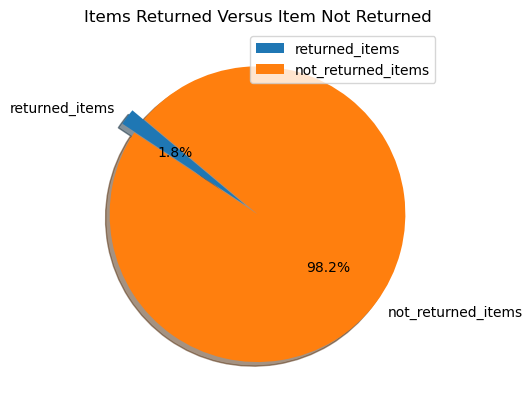

In [59]:
data = [rtnd_items, not_rtnd_items]
df = pd.DataFrame(data,index=[0,1], columns=['Total Sales'])

# plotting a pie char represent the data
labels = ['returned_items','not_returned_items']
plt.pie(df['Total Sales'], explode=(0.1,0),labels=labels,shadow=True,autopct='%1.1f%%', startangle=140)
plt.title('Items Returned Versus Item Not Returned')
plt.legend()
plt.show()

#### Online versus in store sales analysis

Online Sales: 49446018
In-Store Sales: 49484486


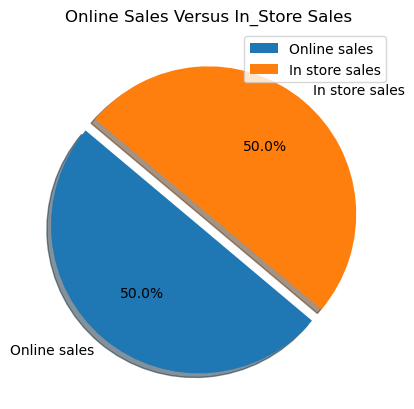

In [61]:
# Total online and in-store sales
online_sales = retail_data['online_purchases'].sum()
in_store_sales = retail_data['in_store_purchases'].sum()
print("Online Sales:", online_sales)
print("In-Store Sales:", in_store_sales)

data = [online_sales, in_store_sales]
df = pd.DataFrame(data,index=[0,1], columns=['Total Sales'])

# plotting a pie char represent the data
labels = ['Online sales','In store sales']
plt.pie(df['Total Sales'], explode=(0.1,0),labels=labels,shadow=True,autopct='%1.1f%%', startangle=140)
plt.title('Online Sales Versus In_Store Sales')
plt.legend()
plt.show()

# SALES TREND

#### Yearly sales trend

In [136]:
# Ensure date is in datetime format
retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date']) 


# Extract year from the transaction_date column
retail_data['year'] = retail_data['transaction_date'].dt.year
retail_data['year']
# To determine yearly sales
yearly_sales = retail_data.groupby(['year'])['total_sales'].sum().reset_index()
yearly_sales

,year,total_sales
0,2020,2.532915e+09
1,2021,2.523145e+09


#### Sales month and year

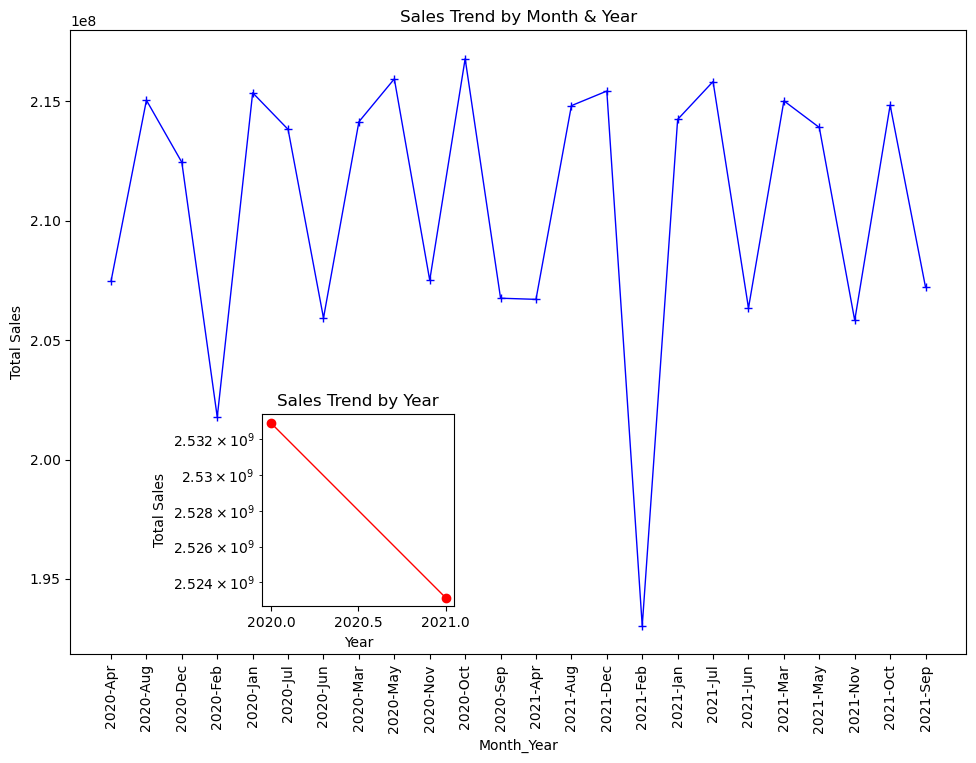

In [138]:
# Total sales by month_year
retail_data['transaction_date'] = pd.to_datetime(retail_data['transaction_date'])  # Ensure date is in datetime format
retail_data['month_year'] = retail_data['transaction_date'].apply(lambda x:x.strftime('%Y-%b'))
sales_by_month = retail_data.groupby('month_year')['total_sales'].sum().reset_index()

fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,1.4,1.3])
axes2 = fig.add_axes([0.4,0.2,0.3,0.4])
axes1.plot(sales_by_month['month_year'],sales_by_month["total_sales"],'b',lw=1,marker = '+')
axes2.plot(yearly_sales['year'],yearly_sales["total_sales"],'r',lw=1, marker = 'o')
axes1.set_title("Sales Trend by Month & Year")
axes1.set_xlabel('Month_Year')
axes1.set_ylabel('Total Sales')

 #set labels for axes2
axes2.set_title("Sales Trend by Year")
axes2.set_xlabel('Year')
axes2.set_ylabel('Total Sales')
axes2.set_yscale('log')

# Set xticks and rotate x-axis ticks for axes2
axes1.set_xticks(sales_by_month.index)  # Set tick positions
axes1.set_xticklabels(sales_by_month['month_year'],rotation=90) # Rotate x-tick labels

plt.show()



#### Grouping sales data based on monthn year and seasons

In [73]:
sales_by_month_season_ = retail_data.groupby(['month_year','season'])['total_sales'].sum().reset_index()
sales_by_month_season_

,month_year,season,total_sales
0,2020-Apr,Fall,51697901.08
1,2020-Apr,Spring,52733058.06
2,2020-Apr,Summer,51580324.00
3,2020-Apr,Winter,51447610.13
4,2020-Aug,Fall,53205862.44
...,...,...,...
91,2021-Oct,Winter,53747375.82
92,2021-Sep,Fall,52177852.05
93,2021-Sep,Spring,51813921.10
94,2021-Sep,Summer,51080719.92


#### Representing sales by different seasons

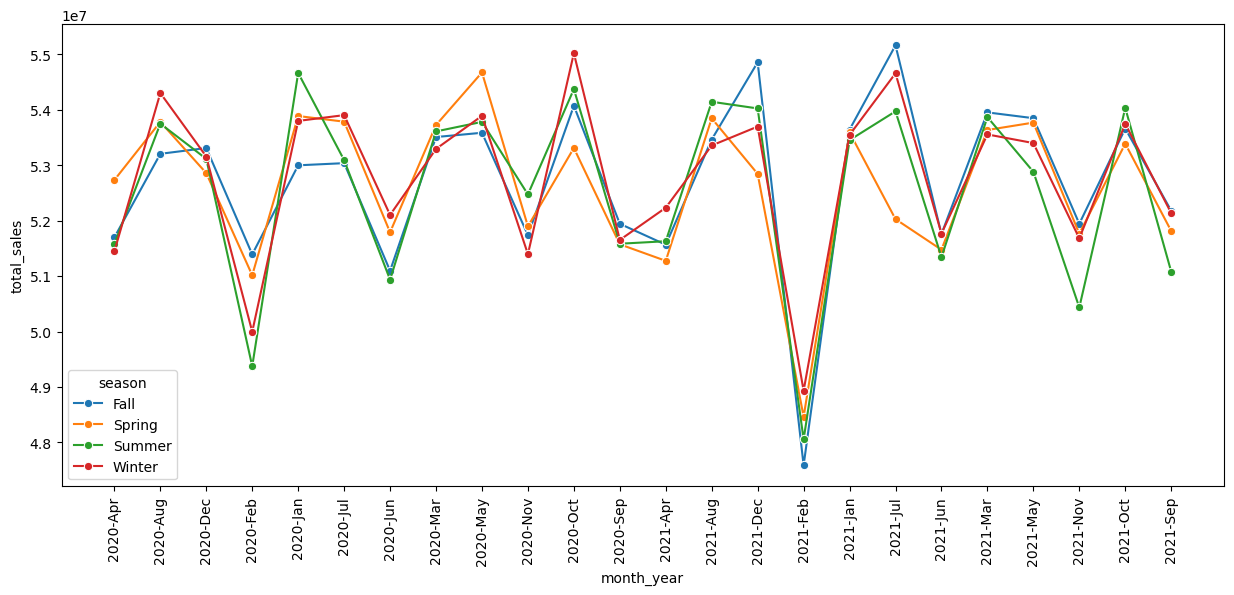

In [74]:
plt.figure(figsize=(15,6))
sns.lineplot(x='month_year',y='total_sales',marker='o', hue='season',data=sales_by_month_season_)
plt.xticks(rotation=90)
plt.show()

## To create a grid of subplots (facets),  based on Season.

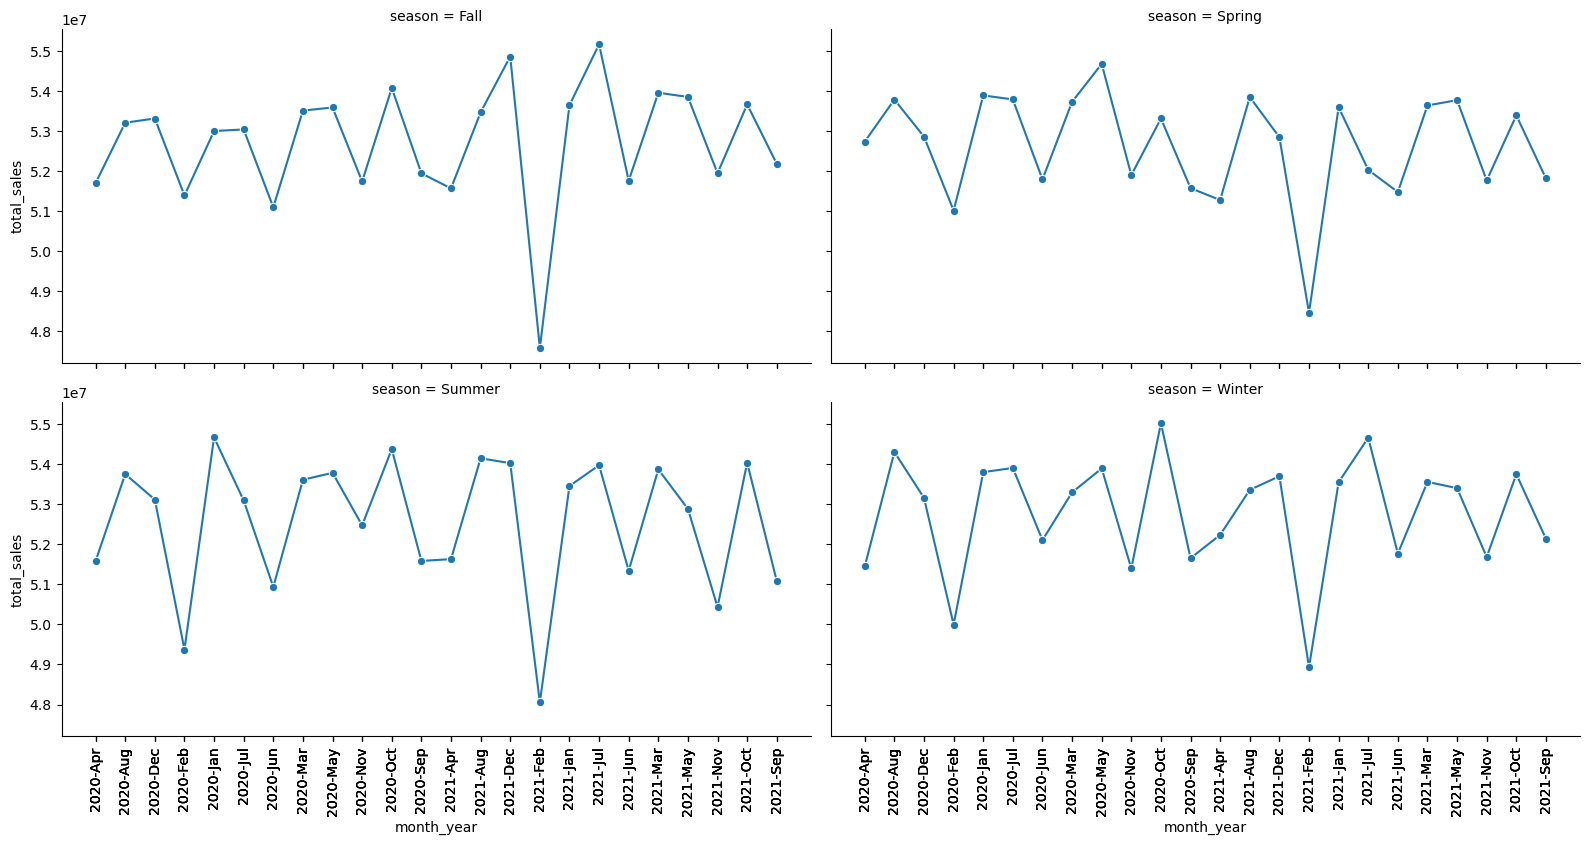

In [76]:
g = sns.FacetGrid(sales_by_month_season_, col="season", col_wrap=2, height=4, aspect=2)
g.map(sns.lineplot, "month_year", "total_sales",marker='o')
g.set_xticklabels(rotation=90)
for ax in g.axes.flat:
    ax.set_xticks(sales_by_month_season_['month_year'])
    ax.set_xticklabels(sales_by_month_season_['month_year'])
plt.show()

In [130]:
sales_by_month_holiday_ = retail_data.groupby(['month_year','holiday_season'])['total_sales'].sum().reset_index()
sales_by_month_holiday_

,month_year,holiday_season,total_sales
0,2020-Apr,No,1.035112e+08
1,2020-Apr,Yes,1.039477e+08
2,2020-Aug,No,1.077526e+08
3,2020-Aug,Yes,1.072875e+08
4,2020-Dec,No,1.063302e+08
5,2020-Dec,Yes,1.061101e+08
6,2020-Feb,No,1.016189e+08
7,2020-Feb,Yes,1.001565e+08
8,2020-Jan,No,1.088226e+08
9,2020-Jan,Yes,1.065284e+08


#### Effects of holiday seasons on sales

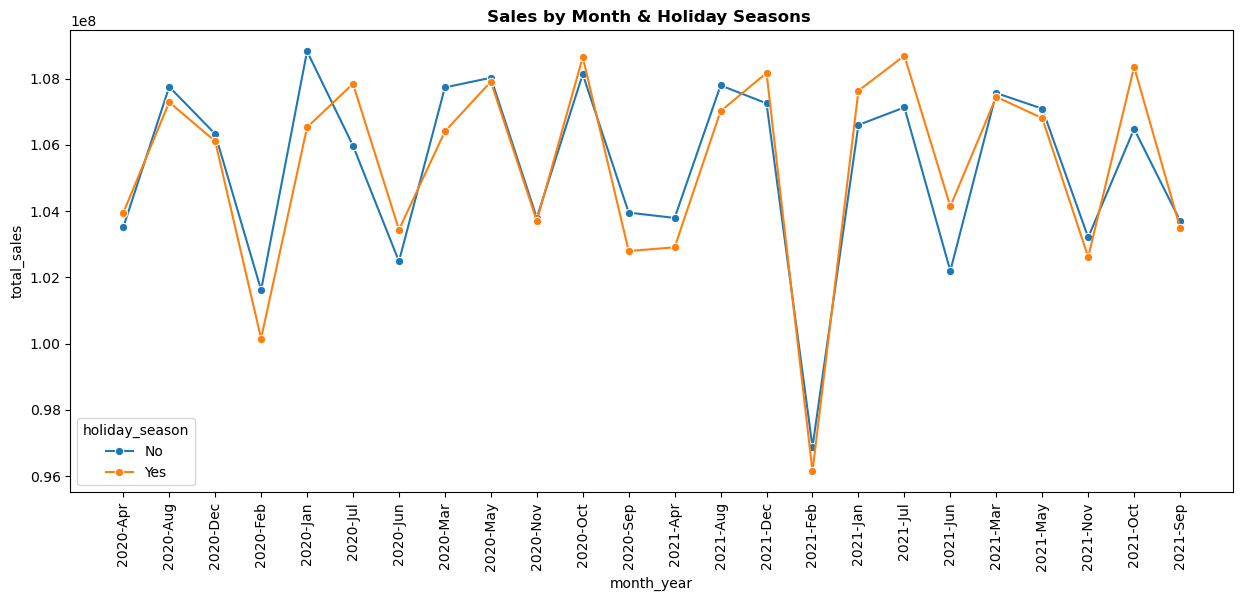

In [134]:
plt.figure(figsize=(15,6))
sns.lineplot(x='month_year',y='total_sales',marker='o', hue='holiday_season',data=sales_by_month_holiday_)
plt.xticks(rotation=90)
plt.title('Sales by Month & Holiday Seasons ',fontweight='bold')
plt.show()